In [51]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# to read in all the words
words=open('indian_name.txt', 'r').read().splitlines()
words[:10]

['resheb',
 'aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen']

In [62]:
len(words)

6486

In [63]:
# to build a vocabulory of charecters to/from integers like string to integer and vise versa
chars=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate (chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [64]:
# To build the dataset

block_size = 3 # it is the context length of how many charecters do we take to predict the next one ?
X ,Y  =[],[] # X are the input to the neuralnet and Y are the lables for each inside X
for w in words: # first using only five words for efficiency then will change  it to use all the words
    # print (w)
    context=[0] *block_size   # Start with zero-padding
    for ch in w +'.':          # Adding '.' as an end token
        ix=stoi[ch]             # Convert character to its index using stoi
        X.append(context)
        Y.append(ix)
        print(''.join (itos[i] for i in context), '----->', itos[ix])
        context=context[1:]+[ix] #context[1:] removes the first element (shifts left). #[ix] appends the new character index. #This maintains the sliding window of block_size.

X= torch.tensor(X) # converting the list into tensor values
Y= torch.tensor(Y)


... -----> r
..r -----> e
.re -----> s
res -----> h
esh -----> e
she -----> b
heb -----> .
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> .
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> a
ida -----> .
... -----> a
..a -----> a
.aa -----> c
aac -----> h
ach -----> a
cha -----> l
hal -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> e
ade -----> s
des -----> h
esh -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> l
dil -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> s
dis -----> h
ish -----> .
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> t
dit -----> y
ity -----> a
tya -----> .
... -----> a
..a -----> a
.aa -----> e
aae -----> n
aen -----> a
ena -----> b
nab -----> .
... -----> a
..a -----> a
.aa -----> f
aaf -----> r
afr -----> e
fre -----> e
ree -----> n
een -----> .
... -----> a
..a -----> a
.aa -----> f
aaf -----> r
afr -----> i
fri -----> n
rin -----> .

In [66]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [67]:
X


tensor([[ 0,  0,  0],
        [ 0,  0, 18],
        [ 0, 18,  5],
        ...,
        [26, 21, 22],
        [21, 22,  5],
        [22,  5,  2]])

In [68]:
# Now let us build a neural network which predict the value Y using th value X

In [69]:
# we have 27 posible charecters  in which we are going to emmbed them in a lower dimentional space
C=torch.randn(27,2) # To generate random values for 27 charecters in an two dimentional space
C

tensor([[-1.0781, -1.3234],
        [ 1.0982,  0.2789],
        [ 0.9094, -0.5046],
        [-1.5528,  0.7981],
        [ 0.6610,  0.2179],
        [ 0.4528,  0.1225],
        [-1.1992, -1.5344],
        [ 0.8779,  2.8247],
        [-0.3243, -0.1632],
        [-0.9777, -1.0553],
        [ 0.0250, -1.2786],
        [-1.1565,  0.7574],
        [-0.2958, -0.0463],
        [ 0.4280,  0.1393],
        [ 0.5543,  0.8372],
        [ 0.5538, -0.2227],
        [ 0.2226, -0.0878],
        [ 1.9664,  0.2571],
        [ 0.6276, -1.0772],
        [-1.8847,  0.7065],
        [ 0.7254,  0.0599],
        [-0.0443, -0.4681],
        [ 0.9879, -0.8804],
        [ 0.1183,  0.9031],
        [ 0.9236,  1.8461],
        [ 0.2630,  0.5303],
        [ 1.2672,  1.5488]])

In [70]:
#F.one_hot(torch.tensor(5), num_classes=27).float() @ C  # converting into a one_hot format where the value place will be zero

In [71]:
# Emmedding using pytorch indexing
# emb = C[X]
# emb


In [72]:
W1 =torch.randn(6,100)# The number of inputs are 6 as its 2 dimentional emmedings and there are 3 as block size and we take no of neurons in the hidden layer as 100 for example
b1= torch.randn(100)


In [73]:
# emb @ W+ b this is what we want to do basically but we have a problem because those tensors are of different shape so we have to turn the [32 , 3 , 2] into [32 , 6] in order to perform this multiplication

In [74]:
#torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1) .shape# used to concatenate those three tensors as 32,6 across dimention 1
#but we wont use this code as we manually entered those values as 3 and we have to use another function in pytorch called unbind which does automatically

In [75]:
#torch.cat(torch.unbind(emb,1),1).shape # This unbind function concatenates the emb accross  dimention 1
# But this is inefficient and creates all kind of new memory so we are using .view to manipulate it to concatenate the tensors

In [76]:
# h=torch.tanh(emb.view(-1,6) @ W1 + b1) # here we use view to concatenate as we give -1 so the pytorch automatically assumes it as 32 or any other values and to0 calculate h we have to use tanh

In [77]:
# h.shape # the sixe is 32, 100 because ther are 32 examples going  to 100 neurons in the hidden layer 

In [78]:
# now we have to do the final layer 
W2 =torch.randn((100,27))
b2 =torch.randn(27)

In [79]:
# logits= h @ W2 +b2 # Then we have to perform the same as makemore 1 do the calculation and find exponential and find the probability and normalize it

In [ ]:
logits.shape

In [ ]:
counts=logits.exp()

In [ ]:
prob=counts / counts.sum(1,keepdims=True)

In [ ]:
# loss=-prob[torch.arange(32),Y].log().mean() # this is the loss of the network to predic the next charecter
# loss

In [ ]:
# ---------------clear view--------------------#

In [82]:
g = torch. Generator().manual_seed (2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 =torch. randn((30, 200), generator=g)
b1 =torch.randn (200, generator=g)
W2 =torch. randn((200, 27), generator=g)
b2 =torch.randn (27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [83]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [84]:
for p in parameters:
    p.requires_grad=True

In [ ]:
for _ in range  (10):
    #Forward Pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh (emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits =h@ W2 + b2 # (32, 27)
    #counts = logits.exp()
    # prob = counts / counts.sum (1, keepdims=True)
    # loss = -prob [torch.arange(32), Y].log() .mean()
    loss=F.cross_entropy (logits, Y) # using cross entropy because it wont create more tensors like previous method
    print(loss.item())

    #Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    for p in parameters:
        p.data+= -0.1 *p.grad
# print(loss.item())

In [ ]:
# The above process may take a lot of time because of large no of example in practically people create it as some mini batches and run it

In [86]:
# build the dataset
def build_dataset (words):# Takes some list of words
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y =[], [] # To build the arrays for those words
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print('.join(itos [i] for i in context), '--->', itos [ix])
            context = context [1:] + [ix] # crop and append
    X =torch.tensor (X)
    Y =torch.tensor (Y)
    print (X. shape, Y.shape)
    return X, Y
import random
random.seed(42)
random.shuffle (words)# randomly shuffling up all the words
n1 = int(0.8*len (words)) # The number of examples to be 80 % of the words
n2 =int(0.9*len (words)) # The number of examples to be 90 % of the words
Xtr, Ytr = build_dataset (words[:n1]) # Calling this function for building the training set Xtr and Ytr by indexing upto n1 ie 80 % training words
Xdev, Ydev = build_dataset (words [n1: n2])# Calling this fuction for building dev dataset Xdev and Y dev by indexing upto n2-n1 3000 examples
Xte, Yte =build_dataset (words [n2:])# Calling this function for building test dataset Xte and Yte by indexing len(words)-n2 as our examples for the test set

torch.Size([38190, 3]) torch.Size([38190])
torch.Size([4749, 3]) torch.Size([4749])
torch.Size([4767, 3]) torch.Size([4767])


In [87]:
lre =torch.linspace(-3, 0 , 1000)
lrs =10**lre

In [88]:
lri=[]
lossi=[]
stepi=[]

In [111]:


for i in range  (50000):

    #Constructing a mini batch
    ix= torch.randint(0,Xtr.shape[0],(32,))

    #Forward Pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh (emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits =h@ W2 + b2 # (32, 27)
    #counts = logits.exp()
    # prob = counts / counts.sum (1, keepdims=True)
    # loss = -prob [torch.arange(32), Y].log() .mean()
    loss=F.cross_entropy (logits, Ytr[ix]) # using cross entropy because it wont create more tensors like previous method
    #print(loss.item())

    #Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    # lr=lrs[i]
    lr=0.1
    for p in parameters:
        p.data+= -lr *p.grad

    # # Track Stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
# print(loss.item())

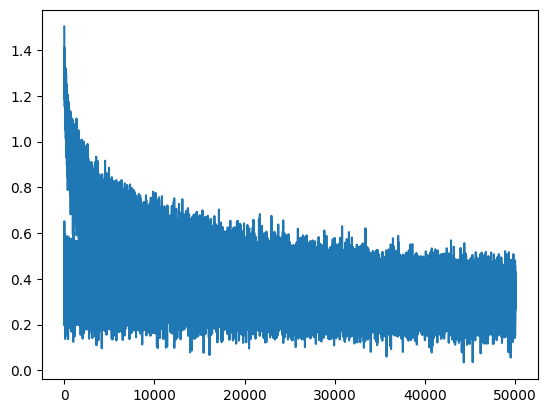

In [112]:
plt.plot(stepi,lossi)

In [113]:
print(loss.item())

1.8312917947769165


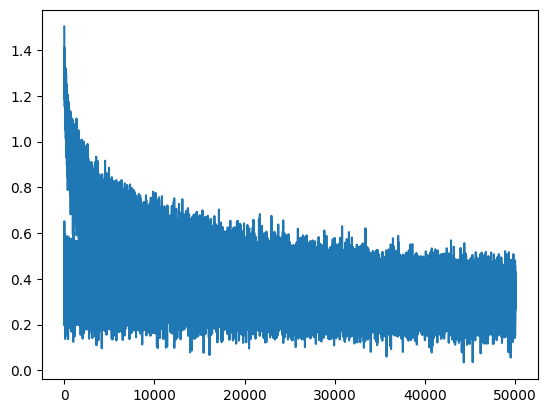

In [114]:
plt.plot(stepi,lossi)

In [115]:
# plt.plot(lri,lossi)

In [122]:
emb = C[Xtr] # (32, 3, 2)
h= torch.tanh (emb.view(-1, 30) @ W1 + b1) #(32, 100)
logits= h @ W2+ b2 # (32, 27)
loss =F.cross_entropy (logits, Ytr)
loss

tensor(2.0450, grad_fn=<NllLossBackward0>)

In [123]:
emb = C[Xdev] # (32, 3, 2)
h= torch.tanh (emb.view(-1, 30) @ W1 + b1) #(32, 100)
logits= h @ W2+ b2 # (32, 27)
loss =F.cross_entropy (logits, Ydev)
loss

tensor(2.3412, grad_fn=<NllLossBackward0>)

In [118]:
# Training split ,dev/validation split , test split
#80% , 10% ,10%

In [119]:
# The 80% of the data we use in the training set is used to optimize the parameters in the model
# The 10% of the examples ie the dev or validation split is used for development of all the hyper parameters ie  for example the size of the hidden layer or the size of the embedding
# The 10% of the Test split is used to evaluate the performance of the model at the end 
# We only evaluate  the loss on the test split only for a few times because we will risk it to the model becoming more overfitting to the test split because every single time when we evaluate our data we basically learning or training from it

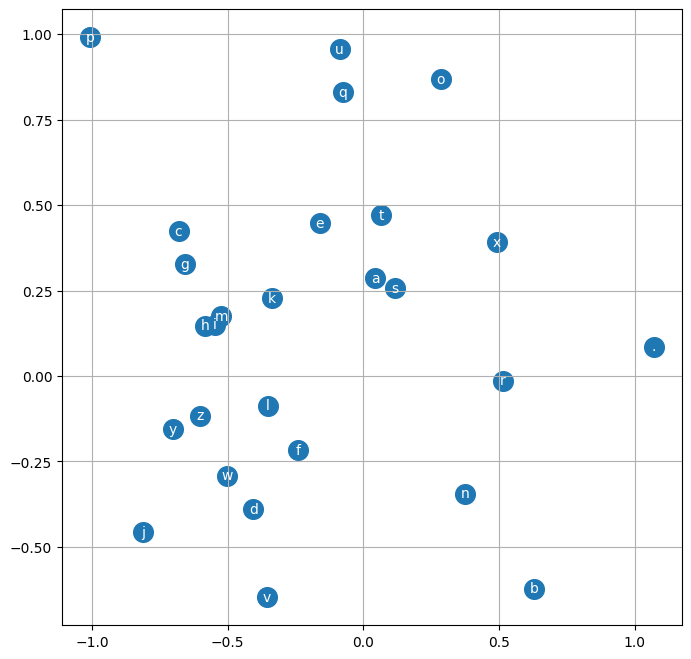

In [120]:
plt.figure(figsize=(8,8))
plt.scatter (C[:,0].data, C[:,1].data, s=200)
for i in range (C. shape [0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos [i], ha="center", va="center", color='white')
plt.grid('minor')

In [121]:
#       Sample from the model

g= torch.Generator().manual_seed(2147483647 +10)

for _ in range(20):
    out=[]
    context= [0]* block_size
    while True:
        emb =C[torch.tensor([context])]
        h = torch.tanh (emb.view(1, -1) @ W1 + b1) 
        logits= h @ W2 +b2
        probs = F.softmax(logits , dim =1)
        ix=torch.multinomial(probs, num_samples=1, generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix== 0:
           break
    print(''.join(itos [i] for i in out))
        

mrikammyanushelender.
mam.
mimasimad.
nik.
simandityini.
mitamareeshweshwari.
kalukmtakashi.
shuberghairi.
siri.
jeetendeen.
puspiq.
megh.
sukaramenakshima.
mustkaramhin.
sakshisunaumarti.
uman.
subramveenat.
prakir.
suka.
shi.
